In [53]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [54]:
active_path="/scratch/PI/rondror/akma327/DynamicNetworks/results/state-decomposition/residue-resolution/110916_state_decomp_union_wb_freq/active_receptors/active_state_decomp_residue_resolution.txt"
inactive_path="/scratch/PI/rondror/akma327/DynamicNetworks/results/state-decomposition/residue-resolution/110916_state_decomp_union_wb_freq/inactive_receptors/inactive_state_decomp_residue_resolution.txt"

In [55]:
with open(active_path, 'rU') as f:
    reader = csv.reader(f, delimiter="\t")
    d_active = list(reader)
darr_active = np.array(d_active)

with open(inactive_path, 'rU') as f2:
    reader = csv.reader(f2, delimiter="\t")
    d_inactive = list(reader)
darr_inactive = np.array(d_inactive)

In [56]:
condition_to_freq = {}

### Active Columns
for col_index in range(1, len(darr_active[0])):
    col_info = darr_active[:, col_index]
    freqs = []
    for f in map(float, col_info[1:]):
#         if(f > 0.01): freqs.append(f)
        freqs.append(f)
    condition_to_freq[col_info[0].strip()] = freqs
    
### Inactive Columns
for col_index in range(1, len(darr_inactive[0])):
    col_info = darr_inactive[:, col_index]
    freqs = []
    for f in map(float, col_info[1:]):
#         if(f > 0.01): freqs.append(f)
        freqs.append(f)
    condition_to_freq[col_info[0].strip()] = freqs

In [57]:
active_keys = []
inactive_keys = []

for k in sorted(condition_to_freq.keys()):
    if("inactive" in k): 
        inactive_keys.append(k)
    else: 
        if("B2AR:active:agonist-bound-nanobody-complex" not in k and "MOR:active:unpublished" not in k):
            active_keys.append(k)

print("Active Receptor Conditions\n")
for a in active_keys:
    print(a)
    
print("\n\nInactive Receptor Conditions\n")
for i in inactive_keys:
    print(i)

Active Receptor Conditions

B2AR:active:long-isoform-B2AR-heterotrimeric-Gs:no_ligand:10.0us:with_membrane,Active
B2AR:active:long-isoform-B2AR-heterotrimeric-Gs:no_ligand:10us:with_membrane,Active
B2AR:active:long-isoform-B2AR-heterotrimeric-Gs:no_ligand:50us:with_membrane,Active
B2AR:active:short-isoform-B2AR-heterotrimeric-Gs:no_ligand:5us:with_membrane,Active
M2R:active:restrained:prot:Asp2x50:3x49-rep_1,Active
M2R:active:restrained:prot:Asp2x50:3x49-rep_2,Active
M2R:active:restrained:prot:Asp2x50:3x49-rep_3,Active
MOR:active-noNb:BU72-nB_interface_restrained:2.7us,Active
MOR:active-noNb:BU72-nB_interface_restrained:2.9us,Active
MOR:active-noNb:BU72-nB_interface_restrained:3.0us,Active
RHO:active:unrestrained-rep_1,Active
RHO:active:unrestrained-rep_2,Active
RHO:active:unrestrained-rep_3,Active


Inactive Receptor Conditions

B2AR:inactive:carazalol:10us:D79-,D130-,Inactive
D4R:inactive:nemanopride:deprotonated:1.3us,Inactive
D4R:inactive:nemanopride:deprotonated:1.50us,Inactive
D4

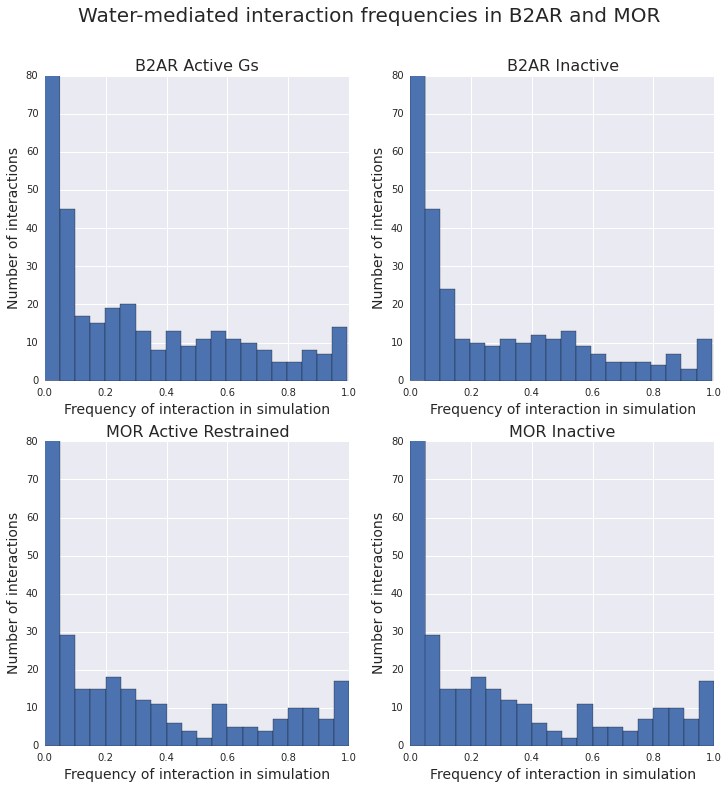

In [58]:
### B2AR vs MOR
### Comparing active and inactive condition frequency distributions

plt.figure(figsize=[12,12])

# plt.subplot(2,2,1)
# b2ar_active = 'B2AR:active:long-isoform-B2AR-heterotrimeric-Gs:no_ligand:10.0us:with_membrane,Active'
# ax = sns.distplot(condition_to_freq[b2ar_active])
# ax.set_title("B2AR:Active:Gs")

# plt.subplot(2,2,2)
# b2ar_inactive = 'B2AR:inactive:carazalol:10us:D79-,D130-,Inactive'
# ax = sns.distplot(condition_to_freq[b2ar_inactive], bins=20)
# ax.set_title("B2AR:Inactive")

# plt.subplot(2,2,3)
# mor_active = 'MOR:active-noNb:BU72-nB_interface_restrained:2.7us,Active'
# ax = sns.distplot(condition_to_freq[mor_active], bins=20)
# ax.set_title("MOR:Active:Restrained")

# plt.subplot(2,2,4)
# mor_inactive = "MOR:inactive:bFNA-antagonist-bound_to_K233:1.42us,Inactive"
# ax = sns.distplot(condition_to_freq[mor_active], bins=20)
# ax.set_title("MOR:Inactive")


plt.subplot(2,2,1)
b2ar_active = 'B2AR:active:long-isoform-B2AR-heterotrimeric-Gs:no_ligand:10.0us:with_membrane,Active'
ax = plt.hist(condition_to_freq[b2ar_active], bins=20)
plt.ylim((0,80))
plt.xlabel("Frequency of interaction in simulation", fontsize=14)
plt.ylabel("Number of interactions", fontsize=14)
plt.title("B2AR Active Gs", fontsize=16)

plt.subplot(2,2,2)
b2ar_inactive = 'B2AR:inactive:carazalol:10us:D79-,D130-,Inactive'
ax = plt.hist(condition_to_freq[b2ar_inactive], bins=20)
plt.ylim((0,80))
plt.xlabel("Frequency of interaction in simulation", fontsize=14)
plt.ylabel("Number of interactions", fontsize=14)
plt.title("B2AR Inactive", fontsize=16)

plt.subplot(2,2,3)
mor_active = 'MOR:active-noNb:BU72-nB_interface_restrained:2.7us,Active'
ax = plt.hist(condition_to_freq[mor_active], bins=20)
plt.ylim((0,80))
plt.xlabel("Frequency of interaction in simulation", fontsize=14)
plt.ylabel("Number of interactions", fontsize=14)
plt.title("MOR Active Restrained", fontsize=16)

plt.subplot(2,2,4)
mor_inactive = "MOR:inactive:bFNA-antagonist-bound_to_K233:1.42us,Inactive"
ax = plt.hist(condition_to_freq[mor_active], bins=20)
plt.ylim((0,80))
plt.xlabel("Frequency of interaction in simulation", fontsize=14)
plt.ylabel("Number of interactions", fontsize=14)
plt.title("MOR Inactive", fontsize=16)

plt.suptitle('Water-mediated interaction frequencies in B2AR and MOR', fontsize=20)


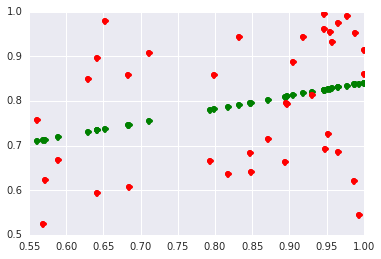

In [59]:
threshold = 0.5

mor_active_freq = condition_to_freq[mor_active]
b2ar_active_freq = condition_to_freq[b2ar_active]

high_mor = []
high_b2ar = []
for i in range(len(mor_active_freq)):
    mor_e, b2ar_e = mor_active_freq[i], b2ar_active_freq[i]
    if(mor_e > threshold and b2ar_e > threshold):
        high_mor.append(mor_e)
        high_b2ar.append(b2ar_e)

m,b = np.polyfit(high_mor, high_b2ar, 1)
y_val = [m*x + b for x in high_mor]
plt.plot(high_mor, y_val, 'go')
plt.plot(high_mor, high_b2ar, 'ro')

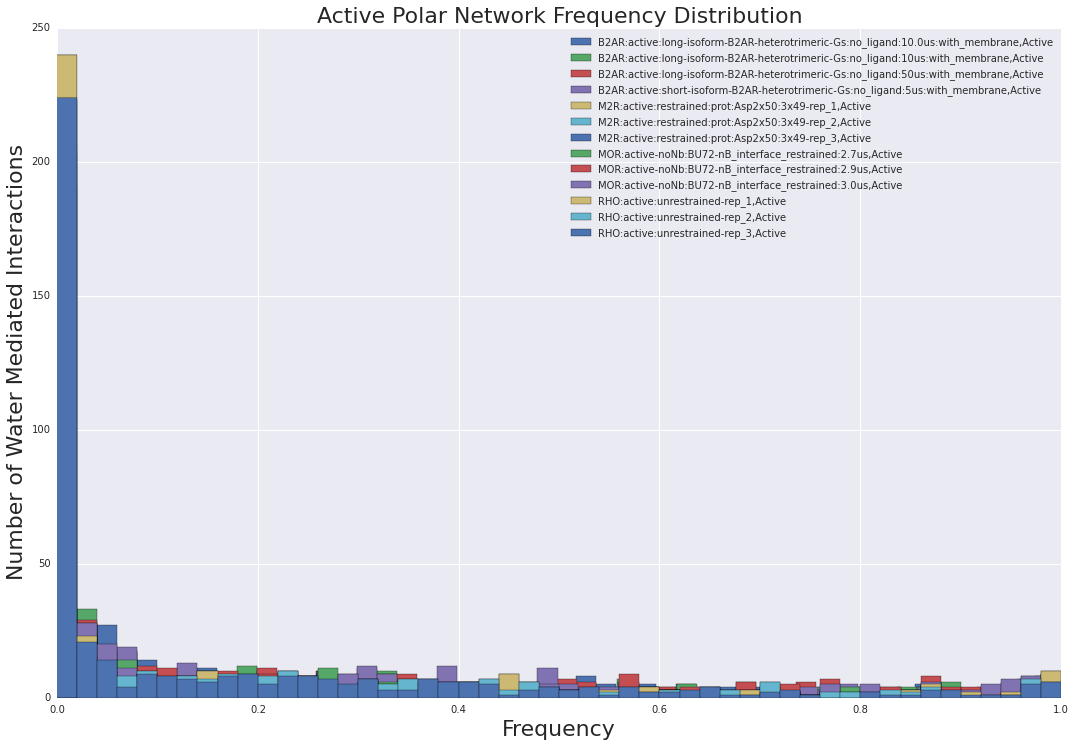

In [60]:
### Active polar network condition distributions

plt.figure(figsize=[18,12])
# for a in sorted(active_keys):
#     ax =sns.distplot(condition_to_freq[a], bins=20, label=a, hist_kws={"range": [0,1]}) 

# ax.set_title("Active Polar Network Frequency Distribution", fontsize=22)
# ax.set_xlabel("Frequency", fontsize=22)
# ax.set_ylabel("Number of Water Mediated Interactions", fontsize=22)
# ax.legend()

for a in sorted(active_keys):
    ax = plt.hist(condition_to_freq[a], bins =50, label=a)
plt.title("Active Polar Network Frequency Distribution", fontsize=22)
plt.xlabel("Frequency", fontsize=22)
plt.ylabel("Number of Water Mediated Interactions", fontsize=22)
plt.legend()
    

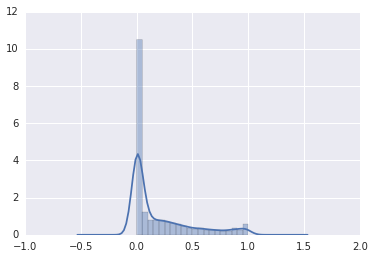

In [61]:
### Aggregated frequency distribution for all active receptor conditions

agg_active_freqs = []
for a in sorted(active_keys):
    agg_active_freqs += condition_to_freq[a]

sns.distplot(agg_active_freqs, bins=20)

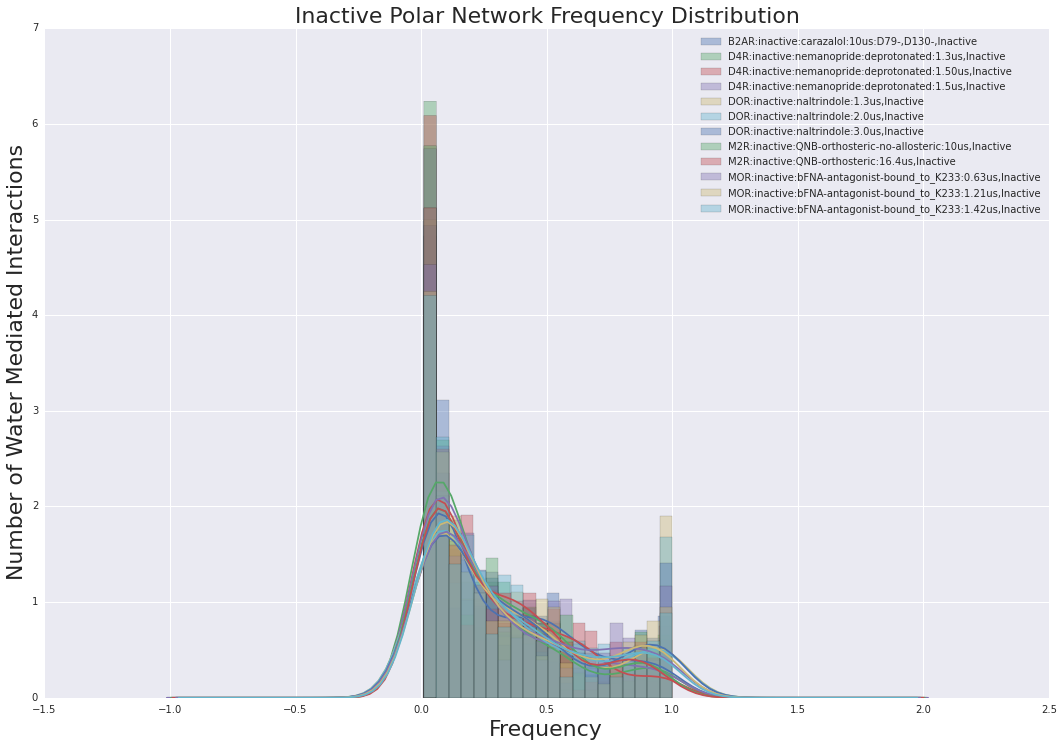

In [9]:
### Inactive polar network condition distributions

plt.figure(figsize=[18,12])
for a in sorted(inactive_keys):
    ax =sns.distplot(condition_to_freq[a], bins=20, label=a) 
ax.set_title("Inactive Polar Network Frequency Distribution", fontsize=22)
ax.set_xlabel("Frequency", fontsize=22)
ax.set_ylabel("Number of Water Mediated Interactions", fontsize=22)
ax.legend()


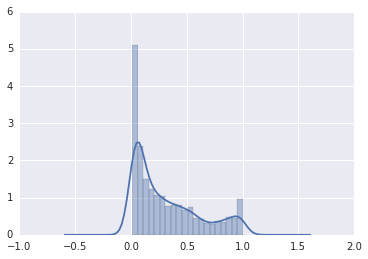

In [10]:
### Aggregated frequency distribution for all inactive receptor conditions

agg_inactive_freqs = []
for i in sorted(inactive_keys):
    agg_inactive_freqs += condition_to_freq[i]

sns.distplot(agg_inactive_freqs, bins=20)